<a href="https://colab.research.google.com/github/PythonDecorator/The-most-popular-Programming-language-in-the-world/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: **Most Tagged Programming Language on Stack Overflow since 2008****

## Data Source
SQL query on StackExchange: 

Link: [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com)
<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, Programming Language, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where Programming Language in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), Programming Language
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.options.display.float_format = '${:,.2f}'.format 
df = pd.read_csv("/content/QueryResults 2023.csv")
df.dropna(inplace = True)
df.rename(columns={'m': 'Year', 'TagName': 'Programming Language', 'Unnamed: 2': 'Numbers of Post'}, inplace=True)
df["Year"] = pd.to_datetime(df["Year"]).dt.strftime('%Y')

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.DataTable.include_index=True



---



# **Data Overview**

In [ ]:
# df.shape
df.describe()

,Numbers of Post
count,2454.000000
mean,4895.374491
std,5890.932279
min,1.000000
25%,427.250000
50%,2458.500000
75%,7077.000000
max,29412.000000


# **Programming Languages**

In [ ]:
df.groupby('Programming Language').first()

,Year,Numbers of Post
Programming Language,,
assembly,2008,8
c,2008,83
c#,2008,3
c++,2008,164
delphi,2008,14
go,2009,65
java,2008,222
javascript,2008,163
perl,2008,28


In [ ]:
df2 = pd.read_csv("/content/QueryResults 2023 - Copy.csv", names=['DATE', 'TAG', 'POSTS'], header=0)



# **Programming language post per month**

In [ ]:
df2["DATE"] = pd.to_datetime(df2["DATE"]).dt.strftime('%Y-%m-%d')
reshaped_df2 = pd.pivot_table(df2, index=['DATE'], columns=["TAG"], values="POSTS")
reshaped_df2

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,283.0,1856.0,5326.0,2860.0,86.0,628.0,5964.0,12517.0,95.0,2886.0,19296.0,3683.0,394.0,1468.0
2023-01-01,238.0,1514.0,5372.0,2658.0,114.0,734.0,5769.0,12249.0,75.0,3078.0,18058.0,3754.0,373.0,1444.0
2023-02-01,189.0,1314.0,4774.0,2226.0,134.0,661.0,5202.0,10471.0,79.0,2442.0,15756.0,3809.0,340.0,1299.0


## We can see that for some months some programming languages have no post.
**Only C# have all months with a post.**



**See the post monthly count below. Out of a possible 178**

In [ ]:
df2.groupby('TAG').count()
# df2.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,177,177
c,177,177
c#,178,178
c++,177,177
delphi,177,177
go,162,162
java,177,177
javascript,177,177
perl,177,177


# **Let's replace the void(NaN) with 0**

In [ ]:
reshaped_df2.fillna(0, inplace=True)
# reshaped_df2.isna().values.any()



---



In [ ]:
program_list = ['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript', 'perl', 'php', 'python','r', 'ruby', 'swift']
def get_no_post(year: str):
    assembly = df[df['Programming Language'] == "assembly"]
    c = df[df['Programming Language'] == "c"]
    c_sharp = df[df['Programming Language'] == "c#"]
    c_plus = df[df['Programming Language'] == "c++"]
    delphi = df[df['Programming Language'] == "delphi"]
    go = df[df['Programming Language'] == "go"]
    java = df[df['Programming Language'] == "java"]
    javascript = df[df['Programming Language'] == "javascript"]
    perl = df[df['Programming Language'] == "perl"]
    php = df[df['Programming Language'] == "php"]
    r = df[df['Programming Language'] == "python"]
    python = df[df['Programming Language'] == "r"]
    ruby = df[df['Programming Language'] == "ruby"]
    swift = df[df['Programming Language'] == "swift"]
    
    assembly_2023 = assembly.loc[assembly['Year']  == year ]['Numbers of Post'].sum()
    c_2023 = c.loc[c['Year']  == year ]['Numbers of Post'].sum()
    c_sharp_2023 = c_sharp.loc[c_sharp['Year']  == year ]['Numbers of Post'].sum()
    c_plus_2023 = c_plus.loc[c_plus['Year']  == year ]['Numbers of Post'].sum()
    delphi_2023 = delphi.loc[delphi['Year']  == year ]['Numbers of Post'].sum()
    go_2023 = go.loc[go['Year']  == year ]['Numbers of Post'].sum()
    java_2023 = java.loc[java['Year']  == year ]['Numbers of Post'].sum()
    javascript_2023 = javascript.loc[javascript['Year']  == year ]['Numbers of Post'].sum()
    perl_2023 = perl.loc[perl['Year']  == year ]['Numbers of Post'].sum()
    php_2023 = php.loc[php['Year']  == year ]['Numbers of Post'].sum()
    r_2023 = r.loc[r['Year']  == year ]['Numbers of Post'].sum()
    pyhton_2023 = python.loc[python['Year']  == year ]['Numbers of Post'].sum()
    ruby_2023 = ruby.loc[ruby['Year']  == year ]['Numbers of Post'].sum()
    swift_2023 = swift.loc[swift['Year']  == year ]['Numbers of Post'].sum()

    number_of_post_2023 = [assembly_2023, c_2023, c_sharp_2023, c_plus_2023, delphi_2023, go_2023, java_2023, javascript_2023, 
                        perl_2023, php_2023, r_2023, pyhton_2023, ruby_2023, swift_2023]
    dict_year ={"Programing Language": program_list, "Numbers of Post": number_of_post_2023}
    return pd.DataFrame(dict_year)
 

# **Plot of Javascript.**

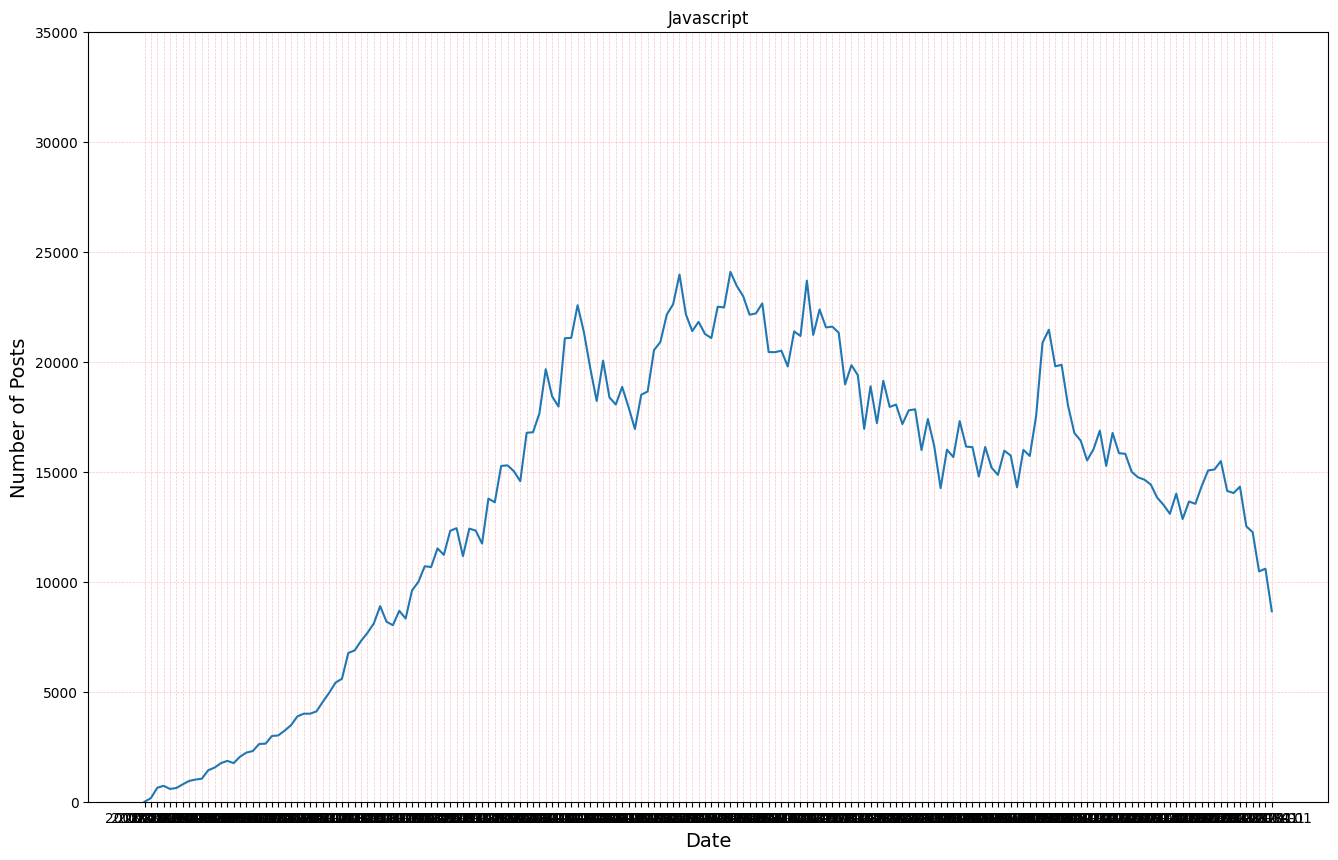

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Javascript')
plt.grid(color = 'pink', linestyle = '--', linewidth = 0.5)
plt.plot(reshaped_df2.index, reshaped_df2['javascript'])

# **Plot of Java.**

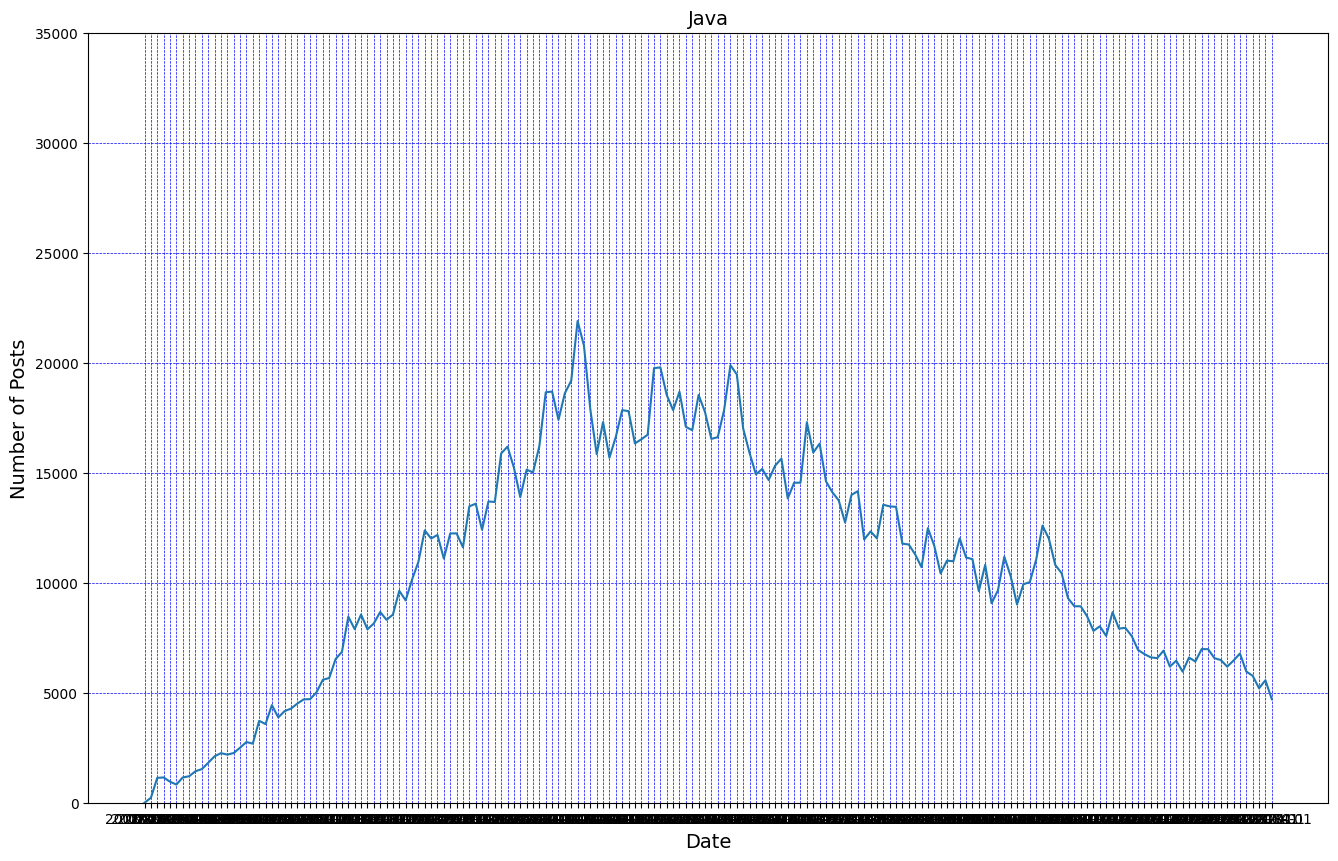

In [ ]:
plt.figure(figsize=(16,10)) 
plt.title('Java', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5)
plt.ylim(0, 35000)
plt.plot(reshaped_df2.index, reshaped_df2.java)

# **Plot of Python**

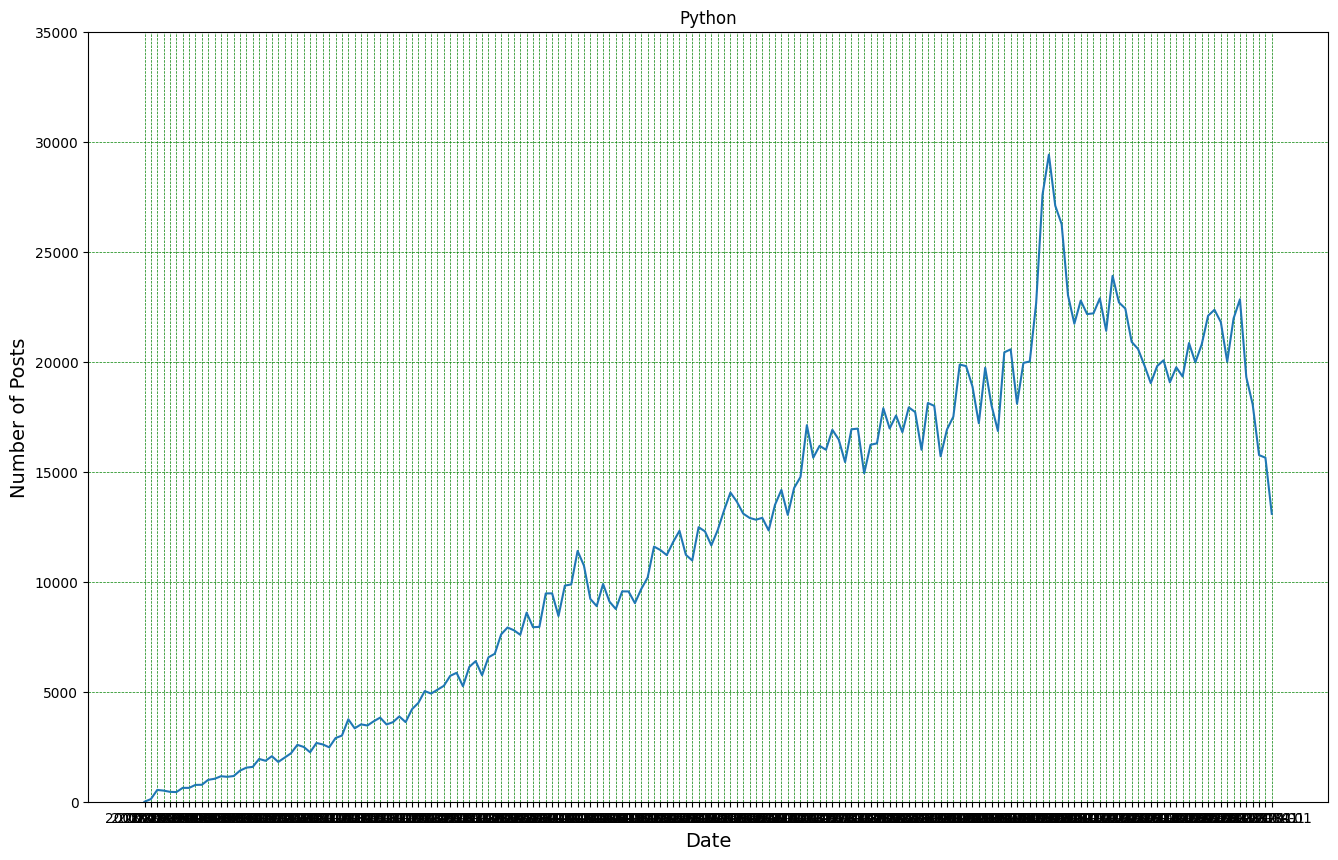

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Python')
plt.ylim(0, 35000)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.plot(reshaped_df2.index, reshaped_df2['python'])

# **Plot of Python Vs Javascript.**

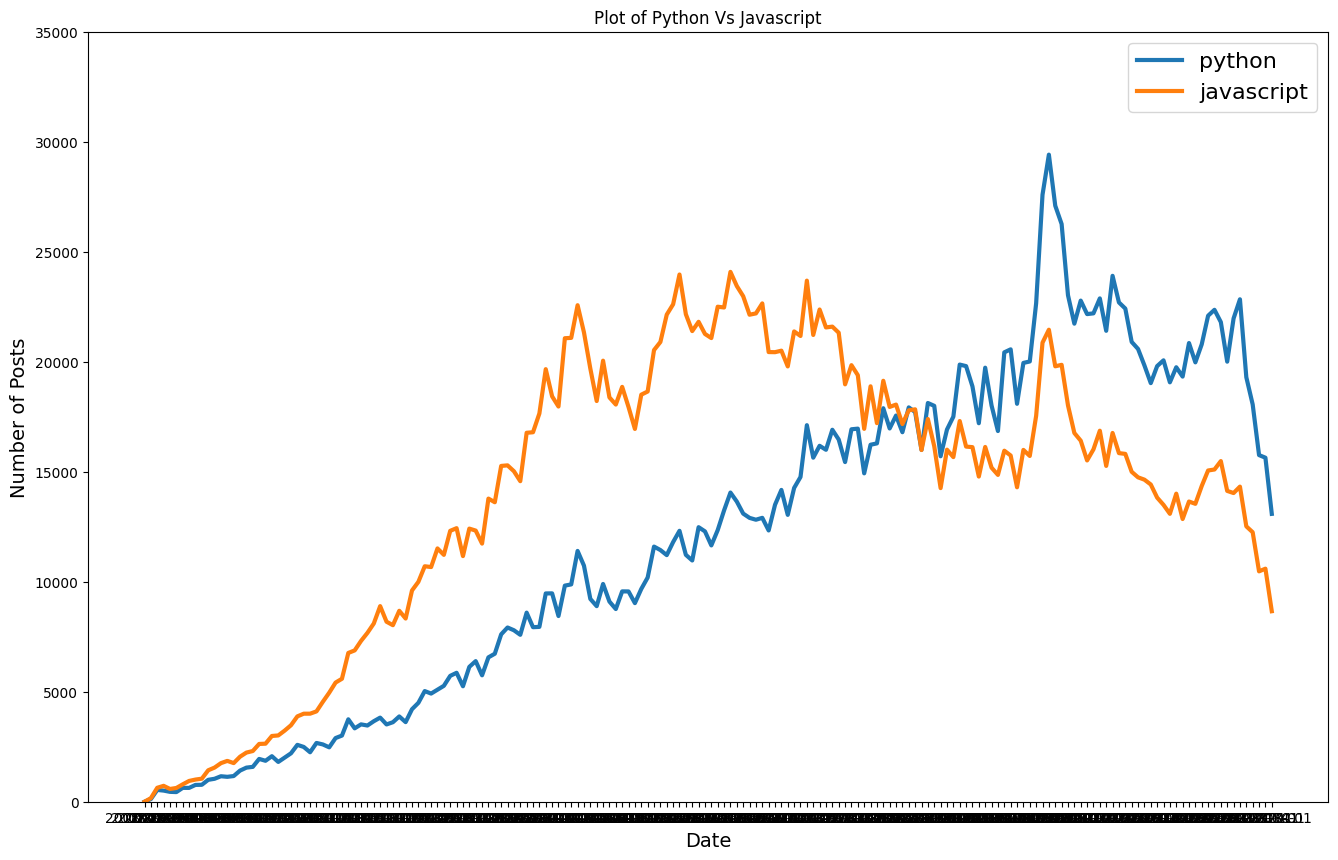

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Plot of Python Vs Javascript')

plt.plot(reshaped_df2.index, reshaped_df2['python'], 
             linewidth=3, label=reshaped_df2['python'].name)

plt.plot(reshaped_df2.index, reshaped_df2['javascript'], 
             linewidth=3, label=reshaped_df2['javascript'].name)

plt.legend(fontsize=16)

# **Ploting all the programming languages.**

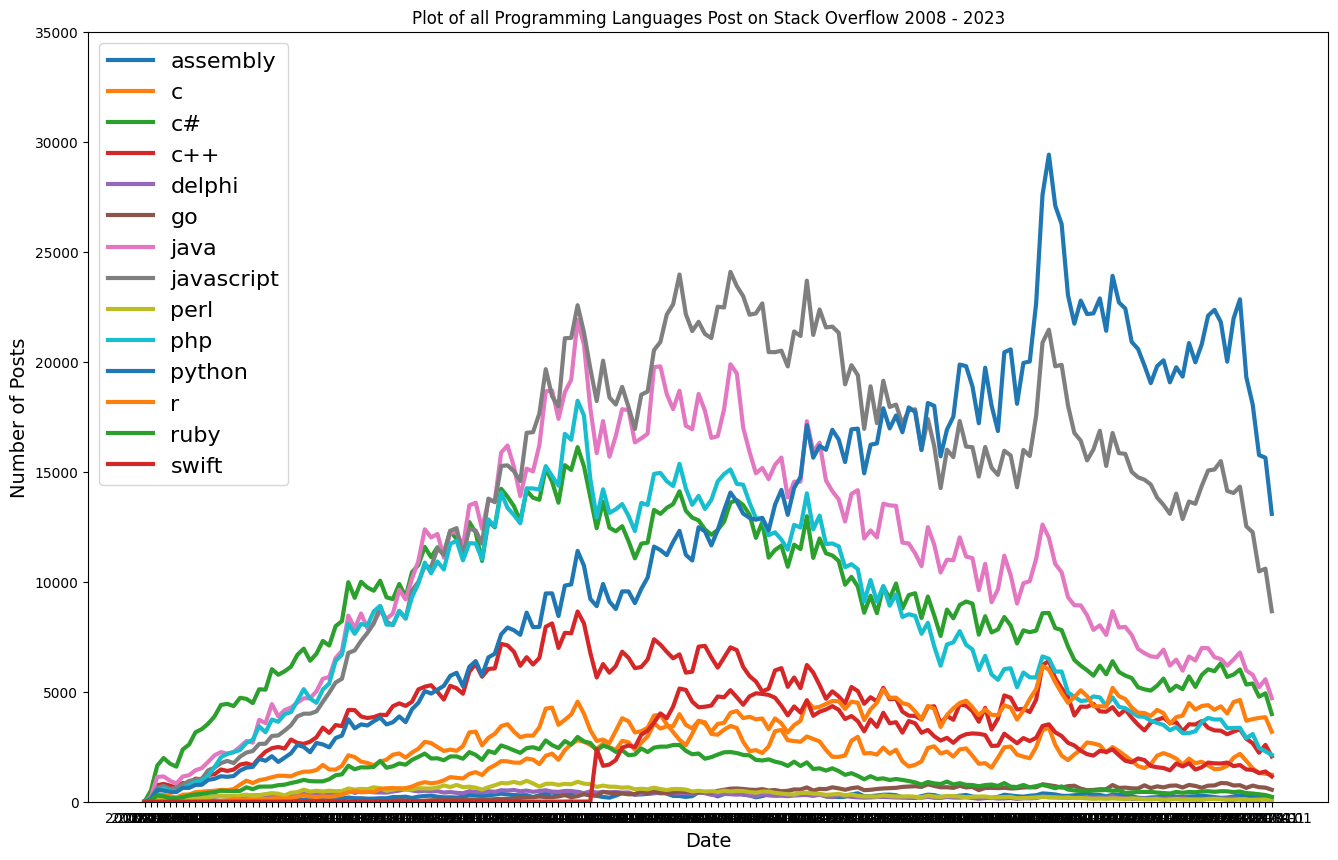

In [ ]:
plt.figure(figsize=(16,10)) 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title('Plot of all Programming Languages Post on Stack Overflow 2008 - 2023')
for column in reshaped_df2.columns:
    plt.plot(reshaped_df2.index, reshaped_df2[column], 
             linewidth=3, label=reshaped_df2[column].name)
    
plt.legend(fontsize=16)

# Let's smooth the graph to see clearer what's going on here.

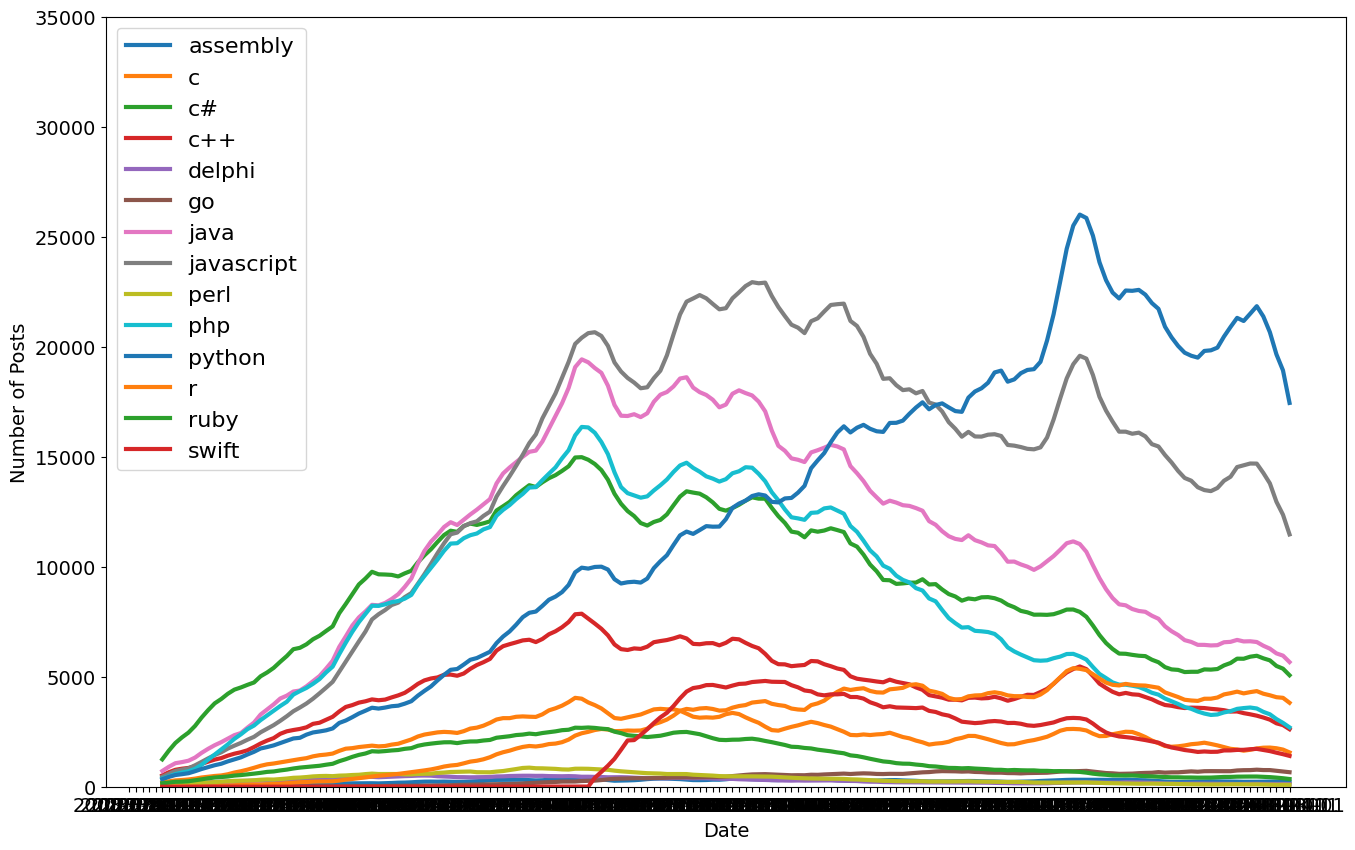

In [ ]:
roll_df2 = reshaped_df2.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df2.columns:
    plt.plot(roll_df2.index, roll_df2[column], 
             linewidth=3, label=roll_df2[column].name)
 
plt.legend(fontsize=16)

**Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win!**



---



# **Programing Language with the highest post in 2008**


---



In [ ]:
table_2008 = get_no_post(year="2008")
table_2008.sort_values(by='Numbers of Post', ascending=False)

,Programing Language,Numbers of Post
2,c#,7463
6,java,4282
3,c++,3090
7,javascript,2724
9,php,2219
10,python,2049
1,c,1150
12,ruby,920
8,perl,516
4,delphi,505


# **Programing Language with the highest post in 2012**


---


In [ ]:
table_2012 = get_no_post(year="2012")
table_2012.sort_values(by='Numbers of Post', ascending=False)

,Programing Language,Numbers of Post
6,java,144301
2,c#,138169
7,javascript,136083
9,php,131004
10,python,64099
3,c++,62999
1,c,30930
12,ruby,24314
11,r,12167
8,perl,7724


# **Programing Language with the highest post in 2016**


---


In [ ]:
table_2016 = get_no_post(year="2016")
table_2016.sort_values(by='Numbers of Post', ascending=False)

,Programing Language,Numbers of Post
7,javascript,263613
6,java,196264
9,php,160491
10,python,158043
2,c#,148497
3,c++,71266
13,swift,56247
11,r,44273
1,c,34457
12,ruby,24000



# **Programing Language with the highest post in 2020**


---



In [ ]:
table_2020 = get_no_post(year="2020")
table_2020.sort_values(by='Numbers of Post', ascending=False)

,Programing Language,Numbers of Post
10,python,284859
7,javascript,213937
6,java,120283
2,c#,87509
9,php,65818
11,r,59932
3,c++,58105
13,swift,33474
1,c,29556
5,go,7941



# **Programing Language with the highest post in 2023**


---



In [ ]:
table_2023 = get_no_post(year="2023")
table_2023.sort_values(by='Numbers of Post', ascending=False)

,Programing Language,Numbers of Post
10,python,62536
7,javascript,41972
6,java,21244
2,c#,19060
11,r,14581
9,php,9942
3,c++,9528
1,c,5323
13,swift,5269
5,go,2580



# **Programing Language with the highest post from 2008 - 2023**


---



In [ ]:
a = df2.groupby('TAG').sum()
dict_2008_2023 ={"Numbers of Post": a['POSTS']}
table_2008_2023 = pd.DataFrame(dict_2008_2023)
table_2008_2023.sort_values(by='Numbers of Post', ascending=False)

<ipython-input-183-e57951cd56a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = df2.groupby('TAG').sum()


,Numbers of Post
TAG,
javascript,2488492
python,2126356
java,1893550
c#,1588527
php,1456715
c++,792355
r,487791
c,395503
swift,326407


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2012.



---




# **Let's represent this in a pie chart**

In [ ]:
total = table_2008_2023['Numbers of Post'].sum()
percentage = (table_2008_2023['Numbers of Post']/total) * 100


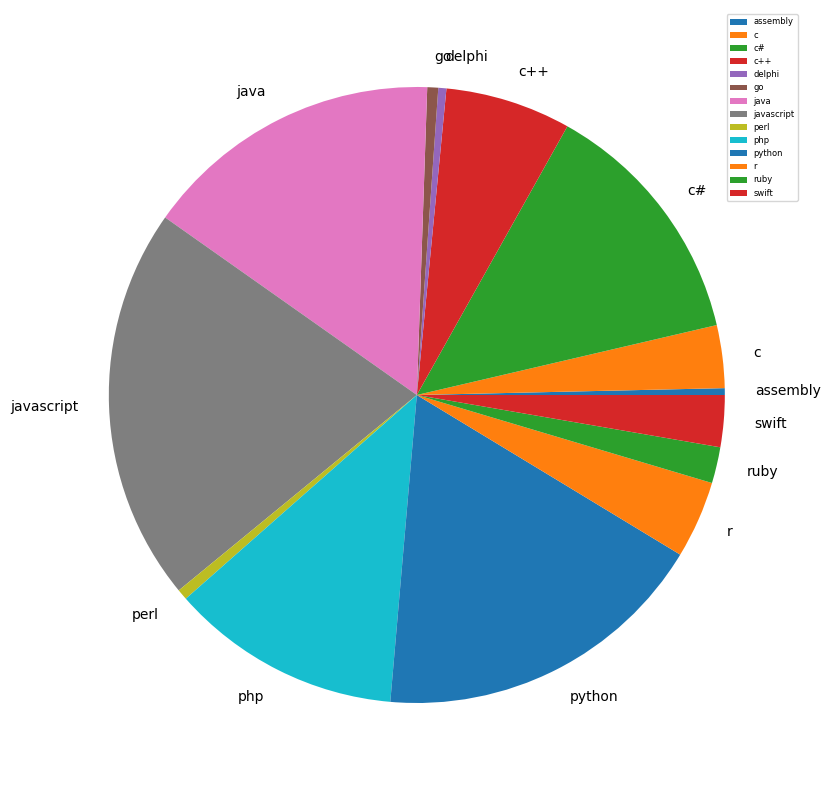

In [ ]:
plt.figure(figsize=(16,10)) 
y = np.array(percentage)
mylabels = table_2008_2023.index
plt.pie(y, labels = mylabels)
plt.legend(fontsize=6)
plt.show() 



---



# **One thing we can do is to get the total post for each programming language for the last 5 years and plot a bar chart.**

*With this we can predict which programming language is making wave and taking over the globe.*

In [ ]:
post_2019 = get_no_post(year="2019")
post_2020 = table_2020
post_2021 = get_no_post(year="2021")
post_2022 = get_no_post(year="2022")
post_2023 = table_2023

post_five_years = post_2019['Numbers of Post'] + post_2020['Numbers of Post']  + post_2021['Numbers of Post'] + post_2022['Numbers of Post'] + post_2023['Numbers of Post'] 
post_five_years_df = pd.DataFrame({"Programming Language": program_list, "Numbers of post from 2019 - 2023": post_five_years})
post_five_years_df.sort_values(by="Numbers of post from 2019 - 2023", ascending=False)


,Programming Language,Numbers of post from 2019 - 2023
10,python,1074837
7,javascript,792848
6,java,432912
2,c#,340837
9,php,242100
11,r,226346
3,c++,202530
13,swift,115910
1,c,106515
5,go,34696


# **See Bar Chart Below**

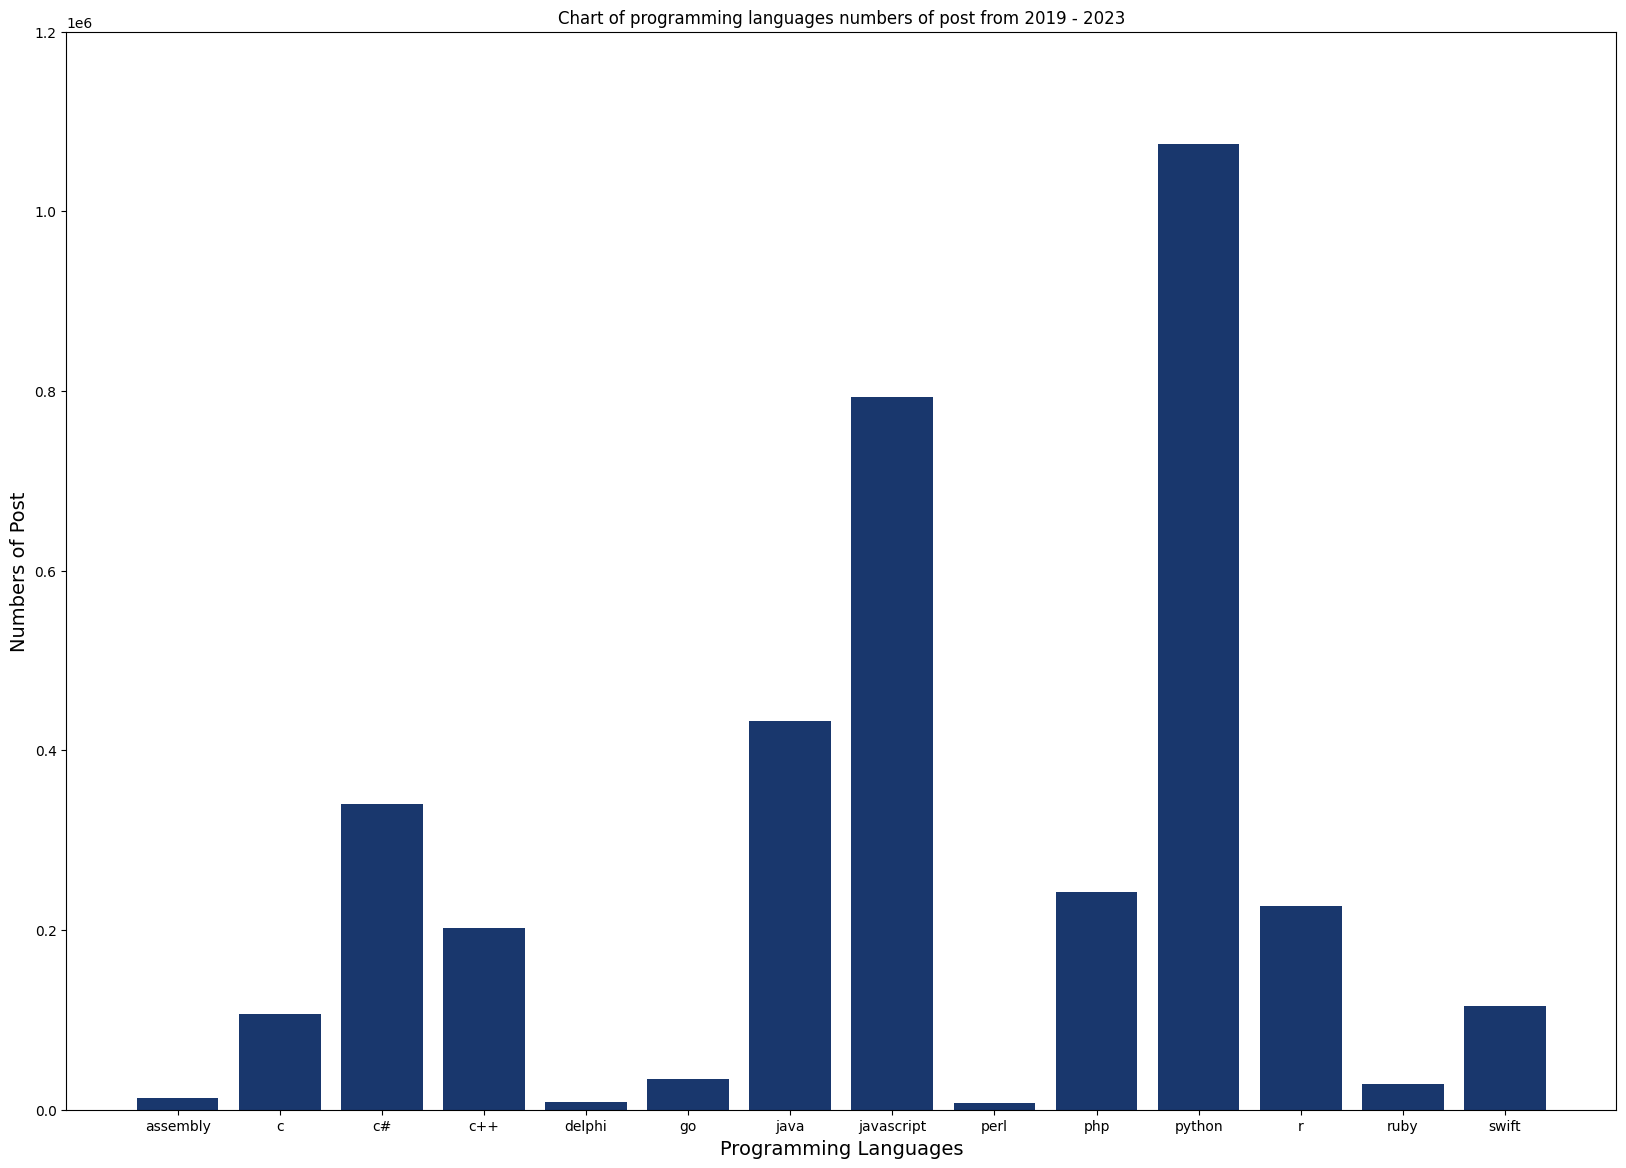

In [ ]:
x = np.array(program_list)
y = np.array(post_five_years)
plt.figure(figsize=(20,14)) 
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Numbers of Post', fontsize=14)
plt.title('Chart of programming languages numbers of post from 2019 - 2023')
plt.ylim(0, 1200000)
plt.bar(x, y, color = "#19376D")
plt.show()

**From the bar chart above we can se that Python has the highest tags or post from the last 5 years.**

*In the next 5 years it is very possible that python will be the most popular and indemand programming language in the world, if not already.* 



---

